TIME SERIES DATA ANALYSIS AND FORECASTING
---


Time series data
---
---
-data collected over time
Uses
---
1. stock prices
2. temperature data 
3. sales data 
4. traffic data
5. Electricity consumption


TIME SERIES COMPONENTS
---
1. Trend-
2. Seasonaity
3. Cycles
4. Noise-- uncertain events



TIME SERIRS ANALLYSIS PROCESS FLOW
1. collecting data and preprocessing
2. Data visualization
3. Ckeck for stationarityu of the series----------- [ ADF (Augmented Dickey- Fuller test)]
4. developiing chaRTS
5. model building ---- ARIMA[Auto-Regressive_ Integration_ Moving Average
6. Extracting insights from prediction


TIME SERIES FORECASTING METHODS
1. simple moving average 
2. Exponentiual smoothing 
3. Autorefressine integrated moving average [ARIMA]

ARIMA
---
1. Autoregressive model [AR]--- Uses past values
2. Integrated [I] -- making stationary
3. MOVING AVERAGE[MA]-- current and future values

In [21]:
import pandas as pd
import numpy as np


In [22]:
# !pip install pmdarima


In [23]:
from traitlets.utils.importstring import import_item
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize']=10,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm
import json






In [24]:
data= pd.read_excel("/content/sample_data/TSLA.xlsx", index_col=0, engine='openpyxl')


In [25]:
data

,time,open,high,low,close,volume
0,2021-08-20 20:00:00,680.2,680.3,680.0,680.3,1357
1,2021-08-20 19:55:00,680.1,680.2,680.1,680.12,1247
2,2021-08-20 19:50:00,679.9,680.0,679.9,680.0,1039
3,2021-08-20 19:45:00,679.9,679.9,679.8,679.8,1444
4,2021-08-20 19:40:00,679.9999,680.0,679.9999,680.0,590
...,...,...,...,...,...,...
45017,2020-08-28 04:50:00,453.602,453.602,453.54,453.54,2855
45018,2020-08-28 04:35:00,454.012,454.012,454.0,454.0,3715
45019,2020-08-28 04:25:00,453.558,453.558,453.558,453.558,1370
45020,2020-08-28 04:10:00,452.0,452.0,452.0,452.0,1855


In [26]:
#dropping null and undefined format
a='%Y-%m-%d %H:%M:%S'
data.time= pd.to_datetime(data.time, format=a, errors='coerce')
data= data[data['time'].notna()]


In [27]:
data


,time,open,high,low,close,volume
0,2021-08-20 20:00:00,680.2,680.3,680.0,680.3,1357
1,2021-08-20 19:55:00,680.1,680.2,680.1,680.12,1247
2,2021-08-20 19:50:00,679.9,680.0,679.9,680.0,1039
3,2021-08-20 19:45:00,679.9,679.9,679.8,679.8,1444
4,2021-08-20 19:40:00,679.9999,680.0,679.9999,680.0,590
...,...,...,...,...,...,...
45017,2020-08-28 04:50:00,453.602,453.602,453.54,453.54,2855
45018,2020-08-28 04:35:00,454.012,454.012,454.0,454.0,3715
45019,2020-08-28 04:25:00,453.558,453.558,453.558,453.558,1370
45020,2020-08-28 04:10:00,452.0,452.0,452.0,452.0,1855


In [28]:
data= data[::-1].reset_index(drop=True)
data

,time,open,high,low,close,volume
0,2020-08-28 04:05:00,451.998,451.998,451.998,451.998,2820
1,2020-08-28 04:10:00,452.0,452.0,452.0,452.0,1855
2,2020-08-28 04:25:00,453.558,453.558,453.558,453.558,1370
3,2020-08-28 04:35:00,454.012,454.012,454.0,454.0,3715
4,2020-08-28 04:50:00,453.602,453.602,453.54,453.54,2855
...,...,...,...,...,...,...
45006,2021-08-20 19:40:00,679.9999,680.0,679.9999,680.0,590
45007,2021-08-20 19:45:00,679.9,679.9,679.8,679.8,1444
45008,2021-08-20 19:50:00,679.9,680.0,679.9,680.0,1039
45009,2021-08-20 19:55:00,680.1,680.2,680.1,680.12,1247


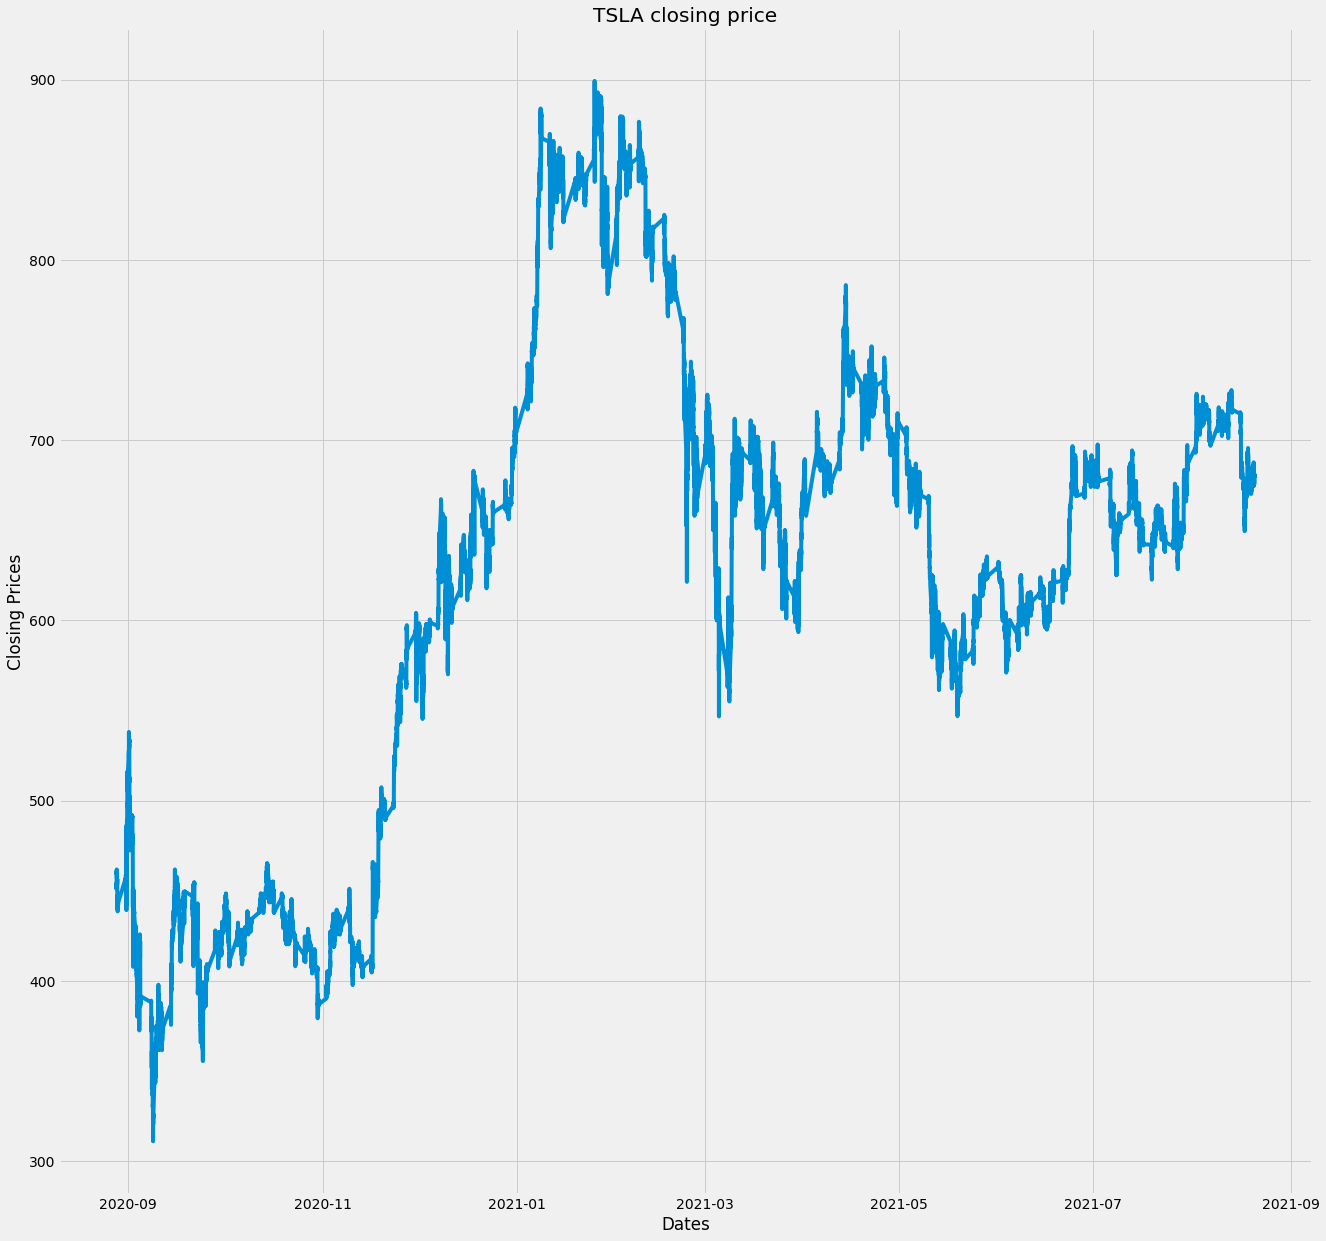

In [29]:
#plot close price
plt.figure(figsize=(20,20))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data['time'],pd.to_numeric(data['close']))
plt.title('TSLA closing price')
plt.show()

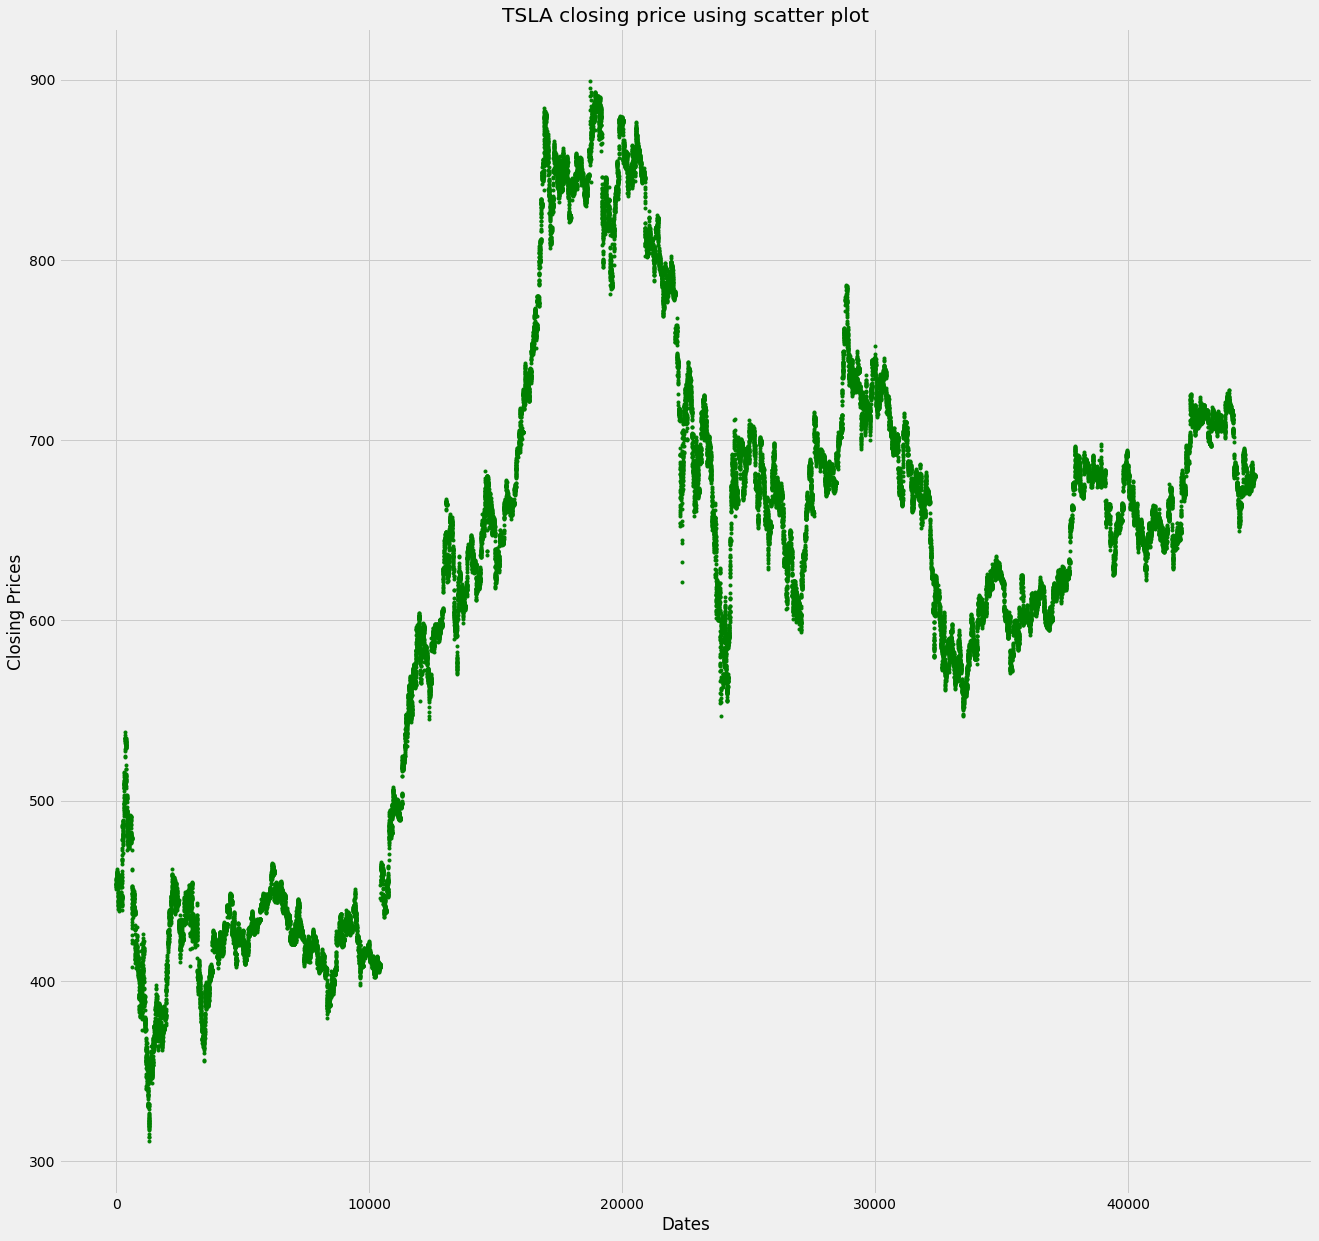

In [30]:
#plot close price using scatter plot
plt.figure(figsize=(20,20))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

df_close=pd.to_numeric(data['close'])
df_close.plot(style='g.')
plt.title('TSLA closing price using scatter plot')
plt.show()


In [31]:
#change to proper data type
data[["open", "high", "low", "close","volume"]]= data[["open", "high", "low", "close","volume"]].apply(pd.to_numeric)


In [32]:
data.describe()


,open,high,low,close,volume
count,45011.000000,45011.000000,45011.000000,45011.000000,4.501100e+04
mean,620.587077,621.572895,619.609182,620.578186,2.057779e+05
std,133.283713,133.324143,133.236525,133.284905,3.567299e+05
min,310.580000,313.850000,308.000000,311.000000,1.000000e+02
25%,516.050000,518.000000,513.850000,516.145150,4.537000e+03
50%,646.298000,647.390000,645.330000,646.250000,3.642100e+04
75%,699.885000,701.000000,698.760000,699.860000,2.818310e+05
max,899.445000,900.400000,892.400000,899.290100,8.516154e+06


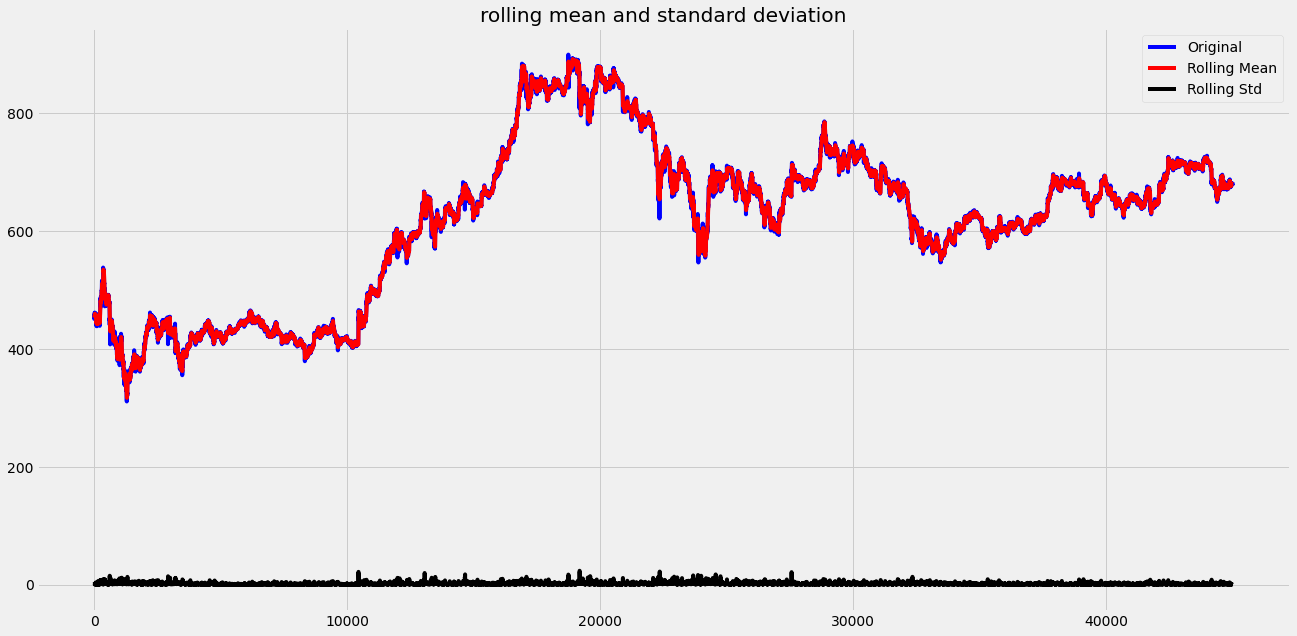

Results of dickey fuller test
Test Statistics                -1.550962
p-value                         0.508167
no od lags used                30.000000
number of deviation used    44980.000000
critical value (1%)            -3.430495
critical value (5%)            -2.861604
critical value (10%)           -2.566804
dtype: float64
----------------------------------------------------------------------------------------------------
weak evidence against null hypothesis, time series has a unit root,indicating it is non stationary


In [34]:
#test for stationary
#HO : it is not stationary
#H1 : it is stationary

def test_stationary(timeseries):
  #determining rolling stats
  rolmean= timeseries.rolling(12).mean()
  rolstd= timeseries.rolling(12).std()
  #plot roling ststs
  
  plt.figure(figsize=(20,10))
  plt.plot(timeseries, color='blue', label='Original')
  plt.plot(rolmean, color='red', label='Rolling Mean')
  plt.plot(rolstd, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('rolling mean and standard deviation')
  plt.show(block=False)


  print("Results of dickey fuller test")
  adft= adfuller(timeseries, autolag='AIC')
  #output for ddt will give us without defining that the values are.
  #hence we manually write what values does it explain using a for loop
  output= pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'no od lags used','number of deviation used'])
  for key,values in adft[4].items():
    output['critical value (%s)'%key]=values
  print(output)
  print('-'*100)
  if output['p-value']<=0.05:
    print("strong evidence against null huypothesis(H0), reject the null hypothesis")
  else:
    print('weak evidence against null hypothesis, time series has a unit root,indicating it is non stationary')

test_stationary(df_close)

    

<Figure size 720x432 with 0 Axes>

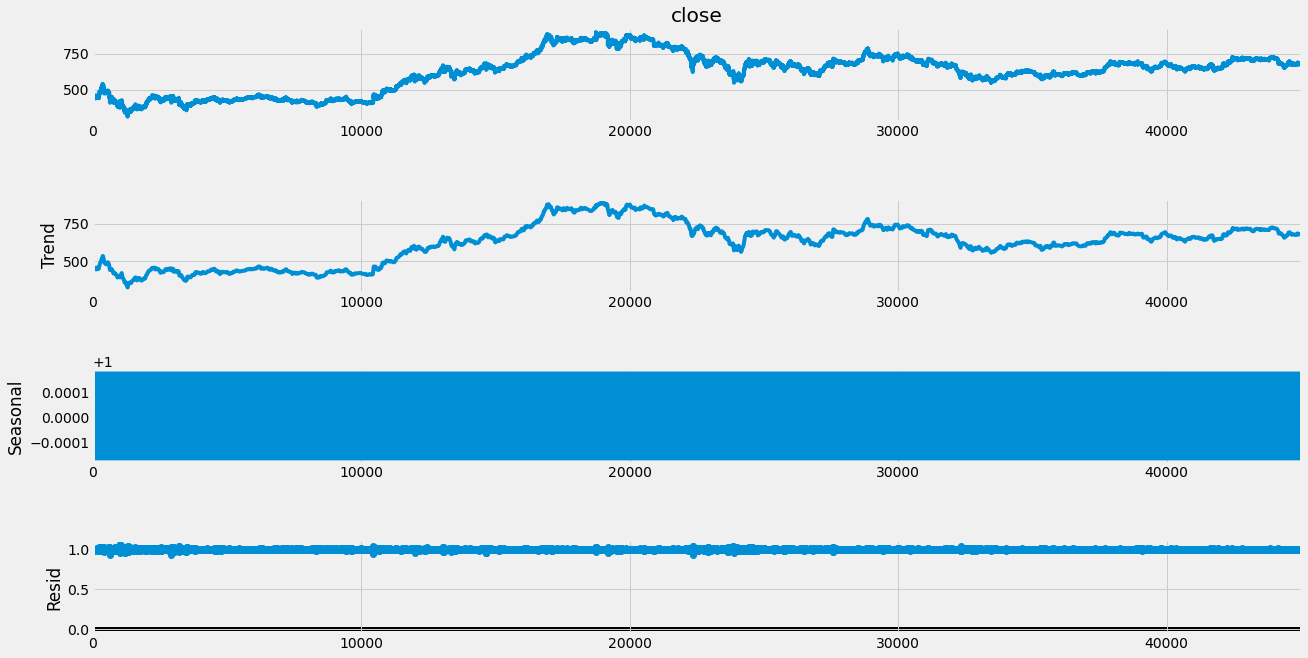

In [35]:
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig= plt.figure()
fig= result.plot()
fig.set_size_inches(20,10)


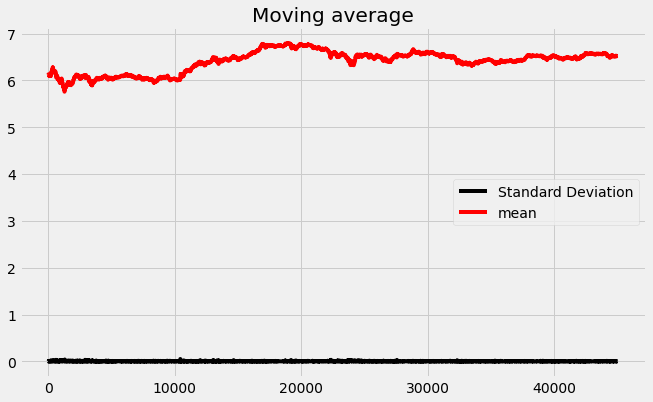

In [37]:
#calculating moving average
rcParams['figure.figsize']=10,6
df_log = np.log(df_close)
moving_avg= df_log.rolling(12).mean()
std_dev= df_log.rolling(12).std()
plt.title('Moving average')
plt.plot(std_dev, color='black', label='Standard Deviation')
plt.plot(moving_avg, color='red',label='mean')
plt.legend()
plt.show()



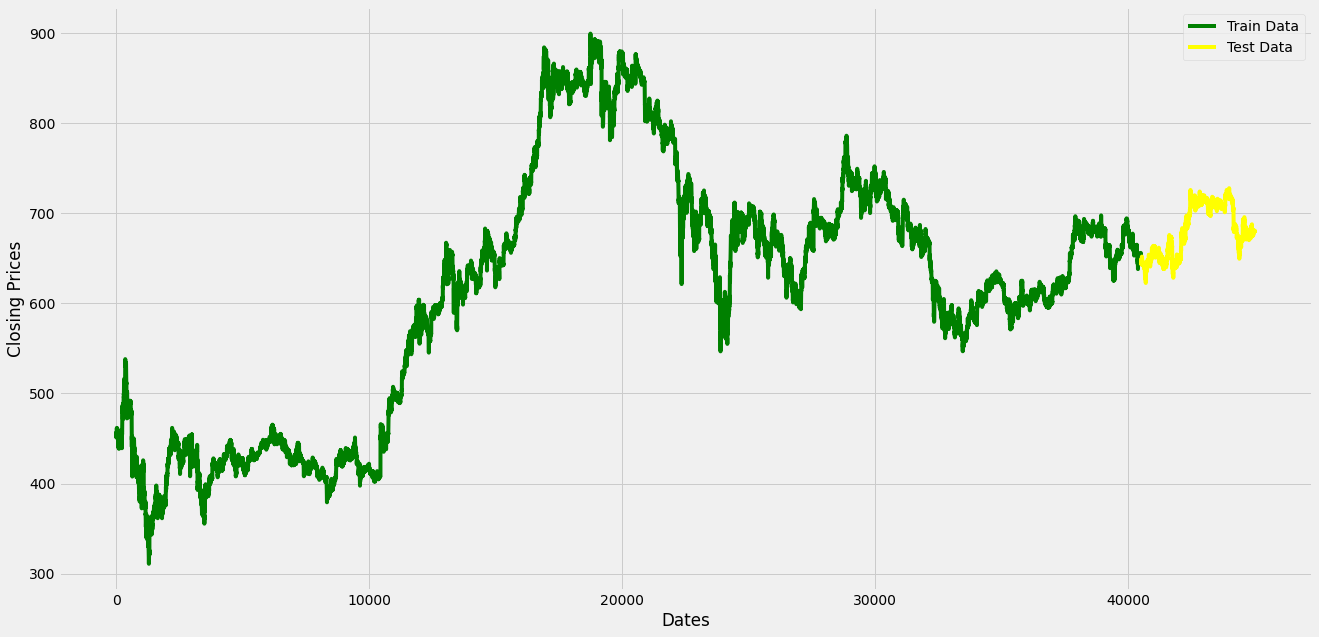

In [44]:
#split data into training and testing
train_data,test_data= df_close[:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data,'green', label='Train Data')
plt.plot(test_data,'yellow', label='Test Data')
plt.legend()



